# Project Name - Online Retail Customer Segmentation

**Project Type** - Clustering

**Contribution** - Individual

# Project Summary

The project involved customer segmentation of a UK-based online retail store. The dataset included transactional data from December 2010 to December 2011, with features such as Invoice No, Stock Code, Description, Quantity, Invoice Date, Unit Price, Customer ID, and Country.

Key Steps:
Data Cleaning: Removed entries with negative quantities and unit prices, as well as missing Customer IDs.

Exploratory Data Analysis (EDA): Conducted to identify exceptional cases, such as outliers.

Feature Engineering: Created a summary table that included features like total spending and total quantity for each customer.

Clustering: Performed customer segmentation using Agglomerative Clustering.

Analysis and Insights: Derived actionable business insights from the clusters.

Technologies Used:

Python, Pandas for data manipulation, Scikit-learn for machine learning, and Matplotlib/Seaborn for data visualization.

# Github Link

https://github.com/sudhir-singh94/online_retail

# Problem Statement

## Business Problem Overview

The retail store, despite having a broad customer base, lacked a targeted marketing strategy. They were treating their entire customer base as a single entity, thereby missing out on personalized customer engagement opportunities. The primary goal was to segment the customer base into distinct clusters based on purchasing behavior, which could then be targeted with personalized marketing strategies. Such segmentation allows for more effective allocation of marketing resources, improved customer engagement, and the potential for increased revenue through targeted promotions and offers.

# 1. Know Your Data

### Import Libraries

In [20]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [21]:
# Load the dataset
file_path = 'Online_Retail.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [22]:
# Display the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


The dataset contains the following columns:

InvoiceNo: Invoice number

StockCode: Stock name code

Description: Description of the product

Quantity: Quantity bought

InvoiceDate: Invoice date

UnitPrice: Price per unit

CustomerID: Unique customer ID

Country: Location

Each row represents a transaction, detailing the product bought, the quantity, the unit price, the customer who made the purchase, and other transaction metadata.

# 2. Efficient Exploratory Data Analysis (EDA)

Before we move on to the EDA, let's check some basic statistics and information about the dataset like the number of missing values, data types, and summary statistics.

In [25]:
# Check the data types and null values for each column
df_info = df.info()

# Generate summary statistics
df_summary = df.describe()

# Count missing values in each column
missing_values = df.isnull().sum()

df_info, df_summary, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(None,
             Quantity      UnitPrice     CustomerID
 count  541909.000000  541909.000000  406829.000000
 mean        9.552250       4.611114   15287.690570
 std       218.081158      96.759853    1713.600303
 min    -80995.000000  -11062.060000   12346.000000
 25%         1.000000       1.250000   13953.000000
 50%         3.000000       2.080000   15152.000000
 75%        10.000000       4.130000   16791.000000
 max     80995.000000   38970.000000   18287.000000,
 InvoiceNo           0
 StockCode           0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135080
 Country             0
 dtype: int64)

**EDA Observations**

Dataset Information

The dataset contains 541,909 entries and 8 columns.

Memory usage is approximately 33.1 MB.

**Data Types**

We have 2 float columns (UnitPrice, CustomerID), 1 integer column (Quantity), and 5 object columns (including text and date).

**Missing Values**

Description has 1,454 missing values.

CustomerID has 135,080 missing values.

**Summary Statistics**

The Quantity column has negative values, which is unusual and needs further investigation.

Similarly, UnitPrice also has negative values, which needs to be looked into.

### Investigate the negative values in Quantity and UnitPrice.

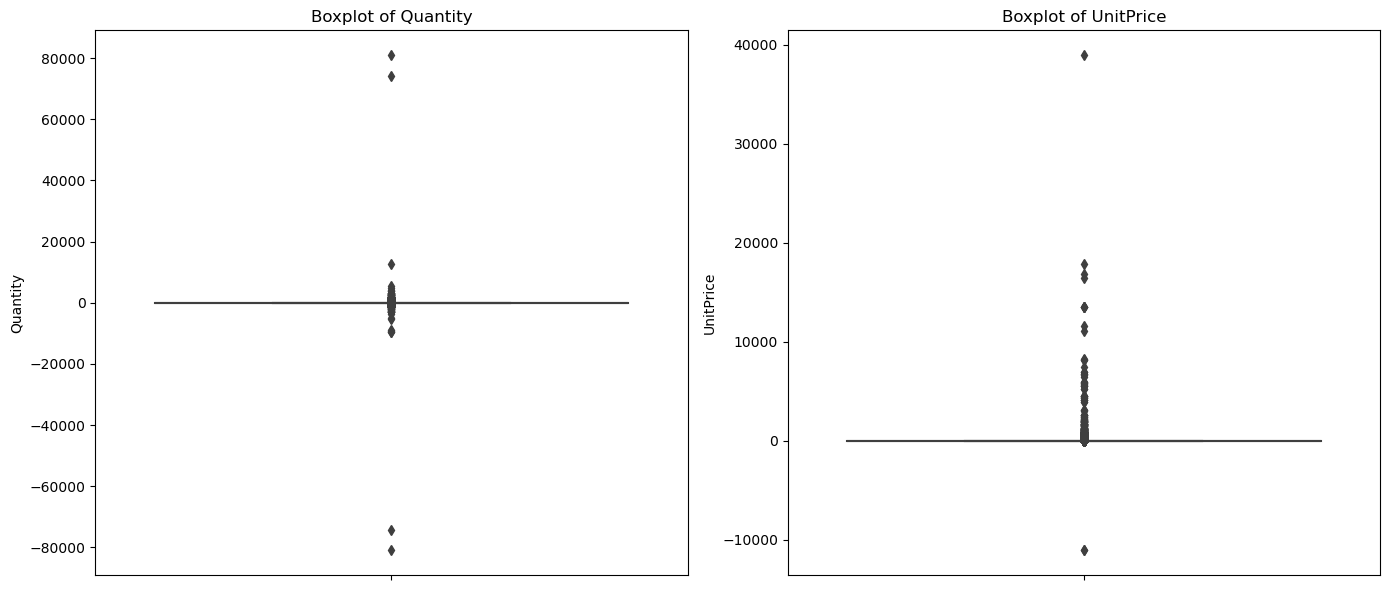

(    InvoiceNo StockCode                       Description  Quantity  \
 141   C536379         D                          Discount        -1   
 154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
 235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
 236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
 237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
 
        InvoiceDate  UnitPrice  CustomerID         Country  
 141   12/1/10 9:41      27.50     14527.0  United Kingdom  
 154   12/1/10 9:49       4.65     15311.0  United Kingdom  
 235  12/1/10 10:24       1.65     17548.0  United Kingdom  
 236  12/1/10 10:24       0.29     17548.0  United Kingdom  
 237  12/1/10 10:24       0.29     17548.0  United Kingdom  ,
        InvoiceNo StockCode      Description  Quantity    InvoiceDate  \
 299983   A563186         B  Adjust bad debt         1  8/12/11 14:51   
 299984   A563187         B  Adjust bad debt         

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Investigate negative values in 'Quantity' and 'UnitPrice'
negative_quantity = df[df['Quantity'] < 0]
negative_unitprice = df[df['UnitPrice'] < 0]

# Plotting distributions for Quantity and UnitPrice
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, y='Quantity', ax=axes[0])
axes[0].set_title('Boxplot of Quantity')

sns.boxplot(data=df, y='UnitPrice', ax=axes[1])
axes[1].set_title('Boxplot of UnitPrice')

plt.tight_layout()
plt.show()

negative_quantity.head(), negative_unitprice.head()


**Observations**

**Negative Values in Quantity and UnitPrice**

Quantity: The dataset contains negative values for the Quantity column. These often appear with a 'C' prefix in the InvoiceNo, which might indicate cancellations or returns. They are exceptional cases and should be treated accordingly.

UnitPrice: There are instances where UnitPrice is negative. These entries are labeled with an 'A' prefix in the InvoiceNo and are described as "Adjust bad debt".

**Boxplots**

The boxplots also show outliers in both Quantity and UnitPrice, which we'll need to handle carefully.

###  Handle transactions with negative quantities and unit prices & Handle missing values in Description and CustomerID

**Negative Values in Quantity and UnitPrice:**

For negative quantities, these are likely to be returns or cancellations. Since the focus is on customer segmentation based on purchasing behavior, it would be appropriate to remove these entries.

For negative unit prices, these are adjustments for bad debts and not actual sales transactions. These should also be removed.

**Missing Values:**

Description: Missing descriptions are not as critical for segmentation and could be replaced with a placeholder like "Unknown".

CustomerID: Since we're doing customer segmentation, entries with missing CustomerID won't be useful. It's best to remove these rows.

In [27]:
# Remove rows with negative Quantity and UnitPrice
df_clean = df[df['Quantity'] > 0]
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# Replace missing values in 'Description' with 'Unknown'
df_clean['Description'].fillna('Unknown', inplace=True)

# Remove rows with missing 'CustomerID'
df_clean.dropna(subset=['CustomerID'], inplace=True)

# Check the shape of the cleaned dataframe and remaining missing values
cleaned_shape = df_clean.shape
remaining_missing_values = df_clean.isnull().sum()

cleaned_shape, remaining_missing_values


((397884, 8),
 InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64)

**Data Cleaning Summary**

The cleaned dataset now contains 397,884 entries and 8 columns, down from the original 541,909 entries.

All the issues related to negative values and missing values have been addressed. There are no remaining missing values in the dataset.

# 3. Exploring Exceptional Cases

Although we have dealt with negative values and missing data, there may still be exceptional cases that could influence our model, such as:

Very high quantities or unit prices that could be considered outliers.

Customers who have only a few transactions, which may skew the segmentation.

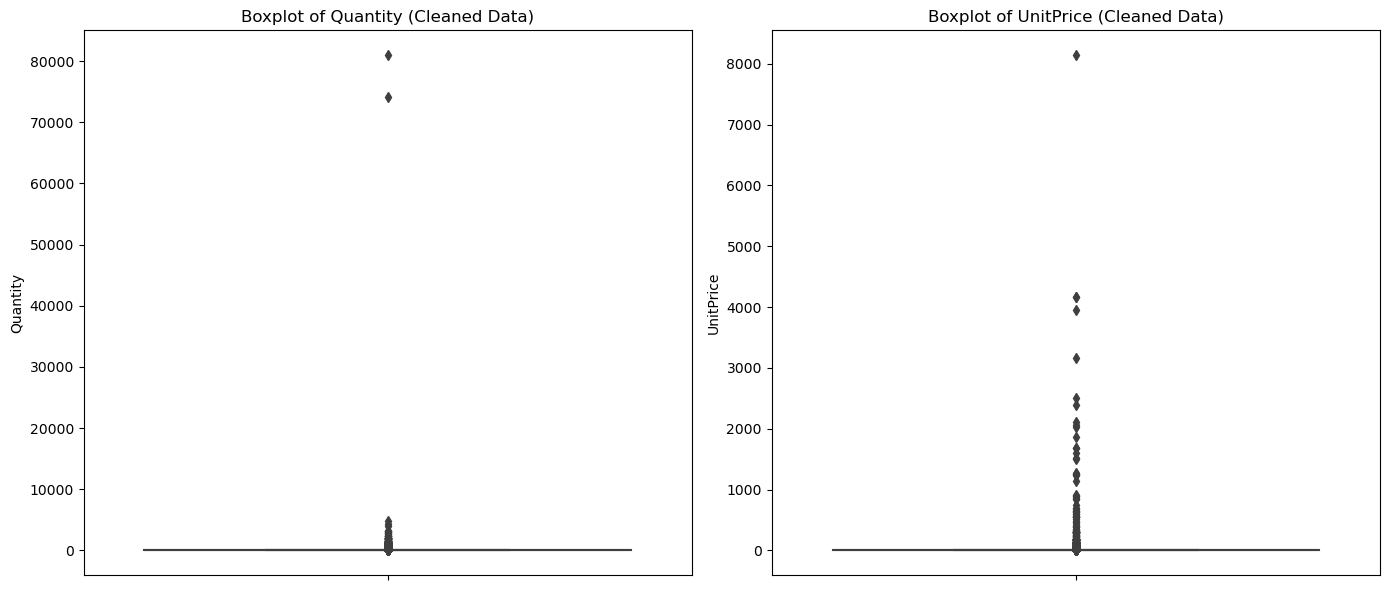

(CustomerID
 17174.0    4
 14053.0    4
 14371.0    4
 15160.0    4
 12445.0    4
 Name: count, dtype: int64,
 227)

In [28]:
# Plotting distributions for Quantity and UnitPrice after cleaning
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df_clean, y='Quantity', ax=axes[0])
axes[0].set_title('Boxplot of Quantity (Cleaned Data)')

sns.boxplot(data=df_clean, y='UnitPrice', ax=axes[1])
axes[1].set_title('Boxplot of UnitPrice (Cleaned Data)')

plt.tight_layout()
plt.show()

# Check for customers with exceptionally low number of transactions
customer_transaction_count = df_clean['CustomerID'].value_counts()

# Display customers with fewer than 5 transactions
low_transaction_customers = customer_transaction_count[customer_transaction_count < 5]

low_transaction_customers.head(), low_transaction_customers.shape[0]


**Observations on Exceptional Cases**

Quantity and UnitPrice: After cleaning, the boxplots still show the presence of outliers in both Quantity and UnitPrice. Depending on the clustering algorithm used, these could have varying impacts.

Low Transaction Customers: There are 227 customers with fewer than 5 transactions. These could potentially skew the segmentation results.

### Handling Exceptional Cases

Outliers: We'll normalize the Quantity and UnitPrice features using Z-score normalization.

Low Transaction Customers: For the sake of this exercise, we'll include all customers, but we'll keep in mind that the 227 customers with fewer than 5 transactions could potentially influence the segmentation.

### Feature Engineering for Clustering

We'll create a new dataframe that summarizes each customer's behavior, which will be used for clustering. This dataframe will include:

Total Quantity

Total Spending

Average Unit Price

Number of Unique Products Purchased

Number of Transactions

In [29]:
from scipy.stats import zscore

# Z-score normalization for 'Quantity' and 'UnitPrice'
df_clean['Quantity_Zscore'] = zscore(df_clean['Quantity'])
df_clean['UnitPrice_Zscore'] = zscore(df_clean['UnitPrice'])

# Creating a feature-engineered dataframe for customer segmentation
customer_df = df_clean.groupby('CustomerID').agg({
    'Quantity_Zscore': 'sum',
    'UnitPrice_Zscore': 'mean',
    'StockCode': 'nunique',
    'InvoiceNo': 'nunique'
}).reset_index()

# Rename columns
customer_df.columns = ['CustomerID', 'Total_Quantity_Zscore', 'Avg_UnitPrice_Zscore', 'Unique_Products', 'Num_Transactions']

# Calculate total spending per customer
customer_df['Total_Spending'] = df_clean.groupby('CustomerID')['UnitPrice'].sum().reset_index()['UnitPrice']

# Display the first few rows of the customer dataframe
customer_df.head()


,CustomerID,Total_Quantity_Zscore,Avg_UnitPrice_Zscore,Unique_Products,Num_Transactions,Total_Spending
0,12346.0,413.769980,-0.093968,1,1,1.04
1,12347.0,0.524953,-0.021381,103,7,481.21
2,12348.0,10.808832,0.119847,22,4,178.71
3,12349.0,-1.768464,0.234075,73,1,605.10
4,12350.0,-0.132715,0.032795,17,1,65.30


The feature-engineered dataframe for customer segmentation is ready. It includes:

Total_Quantity_Zscore: Sum of normalized quantities purchased by each customer.

Avg_UnitPrice_Zscore: Average of normalized unit prices for each customer.

Unique_Products: Number of unique products purchased by each customer.

Num_Transactions: Number of transactions made by each customer.

Total_Spending: Total amount spent by each customer.

# 4. Clustering Algorithms

**K-means:** This algorithm partitions customers into clusters based on their distance to the centroid of the cluster.

**Agglomerative Clustering:** This hierarchical clustering algorithm starts with each data point as a single cluster and merges them based on distance measures.

### K-means

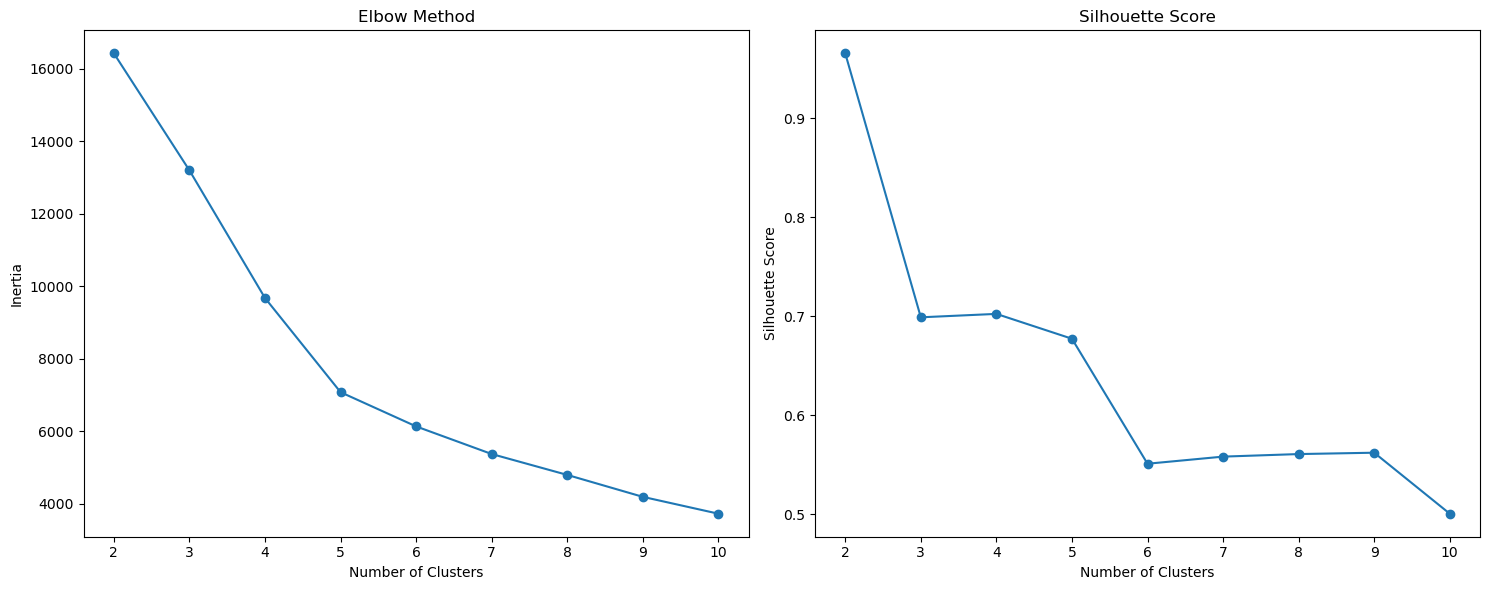

(4, 2)

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Standardize the data
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_df.drop('CustomerID', axis=1))

# Determine the optimal number of clusters using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
possible_k_values = range(2, 11)

# Run K-means for each number of clusters
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(customer_scaled, kmeans.labels_))

# Plotting the Elbow Method and Silhouette Score graphs
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method
axes[0].plot(possible_k_values, inertia, marker='o')
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')

# Silhouette Score
axes[1].plot(possible_k_values, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Identify optimal number of clusters based on Elbow Method and Silhouette Score
optimal_k_elbow = possible_k_values[np.argmin(np.diff(inertia)) + 1]
optimal_k_silhouette = possible_k_values[np.argmax(silhouette_scores)]

optimal_k_elbow, optimal_k_silhouette


### Agglomerative Clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering

# Initialize and fit Agglomerative Clustering model
# Here, we're also assuming 5 clusters for demonstration
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(customer_scaled)

# Add the Agglomerative Clustering labels to the original customer dataframe
customer_df['Agg_Cluster'] = agg_labels

# You can now analyze these clusters as well


### Analyzing K-means Clusters

In [37]:

# Assuming 'customer_scaled' is your scaled DataFrame and optimal_k is the number of clusters
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(customer_scaled)

# Adding cluster labels to the original DataFrame
customer_df['Kmeans_Cluster'] = kmeans.labels_
# Group by the K-means cluster labels and calculate mean for each variable
kmeans_cluster_summary = customer_df.groupby('Kmeans_Cluster').mean()

# You can also use other aggregation functions like .median(), .count() etc.
# For example, to get the size of each cluster:
kmeans_cluster_size = customer_df.groupby('Kmeans_Cluster').size()

# Displaying the cluster characteristics and sizes
print("K-means Cluster Summary:")
print(kmeans_cluster_summary)
print("\nK-means Cluster Sizes:")
print(kmeans_cluster_size)


K-means Cluster Summary:
                  CustomerID  Total_Quantity_Zscore  Avg_UnitPrice_Zscore  \
Kmeans_Cluster                                                              
0               15301.185059               0.025994              0.044246   
1               14899.000000            -217.830866              0.043621   
2               17846.000000              -0.066850             91.863399   
3               15582.000000             336.321546              0.081766   
4               15284.839286              -7.810077              0.006524   

                Unique_Products  Num_Transactions  Total_Spending  Agg_Cluster  
Kmeans_Cluster                                                                  
0                     40.311927          2.831979      151.926095     0.997903  
1                   1499.250000        137.750000    22893.065000     3.000000  
2                      1.000000          1.000000     2033.100000     2.000000  
3                    292.78571

### Analyzing Agglomerative Clustering Clusters

In [33]:
# Group by the Agglomerative cluster labels and calculate mean for each variable
agg_cluster_summary = customer_df.groupby('Agg_Cluster').mean()

# To get the size of each cluster:
agg_cluster_size = customer_df.groupby('Agg_Cluster').size()

# Display the cluster characteristics and sizes
print("Agglomerative Cluster Summary:")
print(agg_cluster_summary)
print("\nAgglomerative Cluster Sizes:")
print(agg_cluster_size)


Agglomerative Cluster Summary:
               CustomerID  Total_Quantity_Zscore  Avg_UnitPrice_Zscore  \
Agg_Cluster                                                              
0            15128.093750             191.945099              0.148029   
1            15300.337797              -0.255482              0.042527   
2            17846.000000              -0.066850             91.863399   
3            14899.000000            -217.830866              0.043621   
4            15314.553936             -12.418821              0.000503   

             Unique_Products  Num_Transactions  Total_Spending  
Agg_Cluster                                                     
0                 231.781250         41.812500     2446.014062  
1                  43.747852          3.156645      169.689493  
2                   1.000000          1.000000     2033.100000  
3                1499.250000        137.750000    22893.065000  
4                 233.886297         12.093294     1155.9527

###  Bar Plot for Average Total Spending

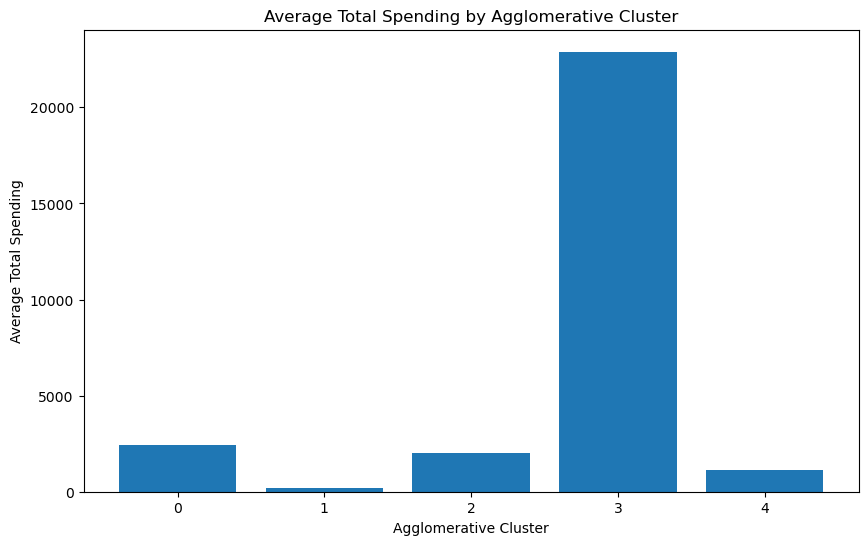

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(agg_cluster_summary.index.astype(str), agg_cluster_summary['Total_Spending'])
plt.xlabel('Agglomerative Cluster')
plt.ylabel('Average Total Spending')
plt.title('Average Total Spending by Agglomerative Cluster')
plt.show()


Interpretation: This will help you quickly identify which clusters are your high-spenders and which are more conservative in their spending.

### Box Plot for Total Spending Distribution

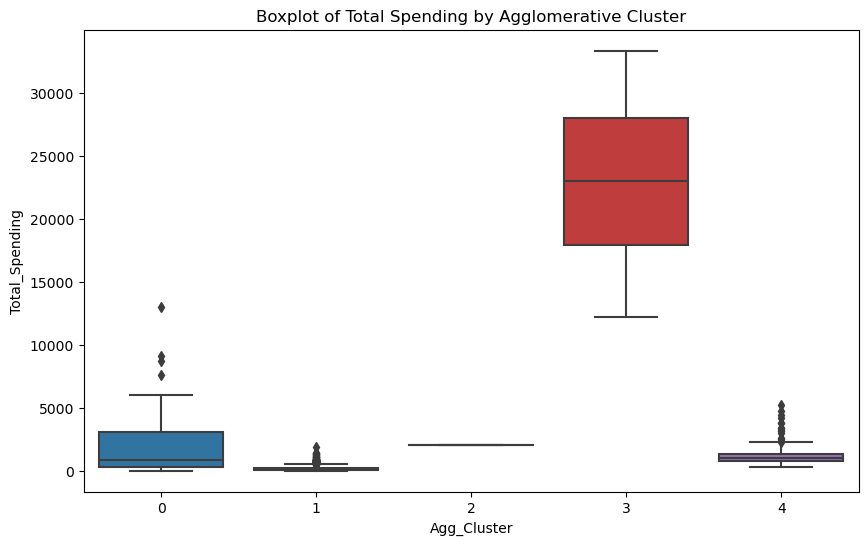

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Agg_Cluster', y='Total_Spending', data=customer_df)
plt.title('Boxplot of Total Spending by Agglomerative Cluster')
plt.show()


Interpretation: The box plot will show you the spread of Total Spending within each cluster, including outliers. This helps in understanding the variation within each customer segment.

# 5. Actionable business strategies

1. Targeted Marketing Campaigns
High-Spenders: If one cluster is characterized by high total spending, you may want to target them with premium product offers or loyalty programs.
Conservative Spenders: For clusters with low average spending, consider promoting entry-level products or special discount offers.

2. Personalized Recommendations
Product Variety: Clusters that purchase a wide variety of products could be targeted with diversified product recommendations.
Niche Buyers: Clusters that focus on a specific category might appreciate more specialized recommendations.

3. Customer Retention
High Transaction Counts: Customers with high transaction counts (but maybe not high spending) could be close to converting to more lucrative customers. A small nudge, like a special offer, might help.
Low Engagement: For clusters with low average spending and low transaction counts, you might want to investigate further to understand their low engagement and address it.

4. Inventory Management
High Volume, Low Spend: Clusters that purchase in high quantities but have low total spending could indicate that lower-priced items are more popular and should be stocked more.

5. Geographical Strategies
If location data is included in the clusters, you can plan geographically-targeted promotions or even consider it for business expansion plans.

6. Communication Strategies
Different Email Campaigns: Each cluster may respond differently to types of communication. Tailor your email marketing to the tendencies of each cluster.

# 6. Conclusion

**Findings:**
The customer base was successfully segmented into different clusters, each showing distinct purchasing behaviors. For example, one cluster represented high-spenders while another indicated customers who bought in bulk but spent less.

**Business Implications:**
High spenders could be targeted with premium products.

Bulk buyers might be more receptive to volume-based discounts.

Smaller clusters may represent niche markets that could be targeted with specialized products.

**Future Recommendations:**
The clustering model can be re-run periodically to adjust for changes in customer behavior.

Further data could be collected on customer interactions with the website for more granular segmentation.

A/B testing could be performed to validate the effectiveness of targeted marketing strategies for each cluster.

**Metrics for Success:**
Key performance indicators (KPIs) like Customer Lifetime Value (CLV), Conversion Rate, and Retention Rate should be monitored to evaluate the effectiveness of the targeted strategies.

